In [ ]:
import os
try:
    path_initialized
except NameError:
    path_initialized = True
    os.chdir('..')

import numpy as np
import datetime as dt
import json
import math
from swiper.lattice_surgery_schedule import LatticeSurgerySchedule
from swiper.schedule_experiments import RegularTSchedule
from swiper.simulator import DecodingSimulator
import swiper.plot as plotter

In [2]:
loaded = LatticeSurgerySchedule.from_str(open('benchmarks/cached_schedules/regular_t_1000_0.lss', 'r').read())

In [3]:
generator = np.random.default_rng(2)
decoder_dists = json.load(open('benchmarks/data/decoder_dists.json', 'r'))
decoder_dist = {}
for dist_str, dist_dict in decoder_dists.items():
    if int(dist_str) == 21:
        decoder_dist = {int(k):v for k,v in dist_dict.items()}
decoding_latency_fn = lambda volume: generator.choice(decoder_dist[max(2, math.ceil(volume / 21))])

In [4]:
simulator = DecodingSimulator()
success, _, device_data, window_data, decoding_data = simulator.run(
    schedule=loaded,
    distance=21,
    scheduling_method='sliding',
    decoding_latency_fn=lambda _: 10,
    speculation_mode='separate',
    speculation_latency=1,
    speculation_accuracy=0.9,
    missed_speculation_modifier=1.4,
    poison_policy='successors',
    max_parallel_processes=None,
    print_interval=dt.timedelta(seconds=10),
    save_animation_frames=False,
    lightweight_setting=0,
    rng=2
)

2024-11-26 15:05:06 | Starting simulation
2024-11-26 15:05:26 | Simulation update: decoder round 1, completed instructions: 0/7001, actively running or decoding instructions: 1, waiting windows: 0/0. Max active instruction index: 0
2024-11-26 15:05:29 | Finished simulation


In [5]:
device_data.num_rounds, decoding_data.max_parallel_processes

(68422, 4)

<Axes3D: >

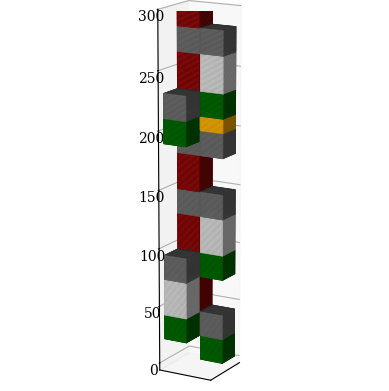

In [6]:
# plotter.plot_device_schedule_trace(device_data, hide_z_ticks=True, z_min=500,
# z_max=600)
plotter.plot_device_schedule_trace(device_data, z_max=300)